## Phase 2 Project Final Submission

* Student: Tracy Strickel
* Student pace: full time
* Scheduled project review date/time: 02/17/2023
* Instructor name: Joe Mata

# Analyzing King County’s Real Estate: Insights for REIT investors

## Overview:
Silicon Sound Investments, an REIT specializing in technology-focused real estate, is looking to expand its portfolio by identifying and acquiring promising properties in King County, Washington. To achieve this, we aim to build a machine learning model that can predict the potential rental income and property value of residential buildings based on their location, size, age, and other relevant features. By using this model, we can identify undervalued properties and negotiate better deals with sellers, ultimately increasing the ROI for our stakeholders.

## Business Problem:
The primary business problem that we aim to solve is identifying undervalued residential properties in King County, Washington, that have potential for high rental income and future appreciation in value. Our stakeholders include Silicon Sound Investments, its investors, and its customers who are looking for high-quality rental properties. By answering the following data questions, we aim to solve this problem:

- What are the key features of residential properties that are most predictive of rental income and property value in King County?
- Can we build an accurate machine learning model to predict rental income and property value based on these features?
- Which properties in King County are currently undervalued and have potential for high rental income and future appreciation in value?
- The predictions generated by our machine learning model are important from a business perspective because they will allow us to identify the most promising properties in King County, negotiate better deals with sellers, and maximize the ROI for our stakeholders.

# Part I: Data Understanding
To summarize, the data for this project is sourced from the [King County Assessor's database](kc_house_data.csv), which includes information on residential properties in King County, Washington. The dataset includes 21 features, including the property's unique identifier (id), the date of sale (date), and various physical characteristics of the property (e.g., number of bedrooms, bathrooms, square footage of living space, lot size, number of floors). The target variable for the project is the sale price of the property price.

Some of the other features that will be used in the analysis include waterfront, greenbelt, nuisance, view, condition, grade, heat_source, sewer_system, sqft_above, sqft_basement, sqft_garage, sqft_patio, yr_built, and yr_renovated. The address, lat, and long fields have been retrieved using a third-party geocoding API.

The data represents residential properties that were sold in King County, Washington, and the variables included in the dataset provide various physical and environmental characteristics of these properties. The data will be used to answer questions related to the potential rental income and property value of residential buildings in King County, with the aim of identifying undervalued properties that have potential for high rental income and future appreciation in value. 

**Let's get started!**

### Library and Data Imports

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import skew
from scipy.stats import kurtosis

# Import column names file
with open("data/column_names.md") as f:
    column_names = f.readlines()
    
# Remove the newline character from each line
column_names = [x.strip() for x in column_names]

# Import CSV file
df = pd.read_csv("data/kc_house_data.csv", header=0)

#### Column Names and Descriptions for King County Data Set


* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `address` - The street address
* `lat` - Latitude coordinate
* `long` - Longitude coordinate

Most fields were pulled from the [King County Assessor Data Download](https://info.kingcounty.gov/assessor/DataDownload/default.aspx).

The `address`, `lat`, and `long` fields have been retrieved using a third-party [geocoding API](https://docs.mapbox.com/api/search/geocoding/). In some cases due to missing or incorrectly-entered data from the King County Assessor, this API returned locations outside of King County, WA. If you plan to use the `address`, `lat`, or `long` fields in your modeling, consider identifying outliers prior to including the values in your model.

In [2]:
print('We have', df.shape[0], 'rows and', df.shape[1], 'columns in our dataset.')

We have 30155 rows and 25 columns in our dataset.


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In the dataset, there are 5 columns with float data type, 10 columns with integer data type, and 10 columns with object data type.

The missing values are in the columns `heat_source` and `sewer_system` with 32 and 14 missing values, respectively.

Converting the `date` column to a datetime data type would be beneficial for further analysis.

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


**The stats**
- The dataset contains 30,155 observations with 25 features.

- There are no missing values for the `price`, `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`, `sqft_above`, `sqft_basement`, `sqft_garage`, `sqft_patio`, `yr_built`, `yr_renovated`, `address`, `lat`, and `long` features. However, `heat_source` and `sewer_system` features have 32 and 14 missing values respectively.

- The mean sale price of houses in the dataset is around 1.1 million dollars, with a standard deviation of around 900k.

- The mean number of bedrooms is around 3.4, with a minimum of 0 and a maximum of 13.

- The mean number of bathrooms is around 2.3, with a minimum of 0 and a maximum of 10.5.

- The mean square footage of living space in the homes is around 2112, with a standard deviation of around 974.

- The mean lot size is around 16,723, with a standard deviation of around 60,382.

- The median year of sale is 2015.

- The mean house age is 48.1 years, with a standard deviation of 32.1 years.


**Observations**
- The minimum value for bedrooms and bathrooms is 0. This seems highly unlikely and may indicate errors or missing data in the original dataset.

- The maximum values for several variables, including price and square footage, are much higher than their means and medians, suggesting the presence of outliers or extreme values in the dataset.

- The standard deviation for many of the variables is relatively high, indicating that the data is spread out or variable.

- The median year of sale (yr_sold) is 2021, which suggests that the data is relatively recent.

- The mean house age (48.1 years) is higher than the median house age (46 years), which suggests that there may be some older houses in the dataset that are skewing the average

Overall, this summary suggests that the dataset may contain some unusual or extreme values that could affect any analysis or modeling based on the data. It may be necessary to take a closer look at the data to identify and address these issues.

#### Preliminary Correlation
Correlation analysis can help to identify which variables are positively or negatively correlated with sale price, and the strength of these correlations. Variables that are positively correlated with sale price, meaning that they tend to increase as the sale price increases, are likely to be good predictors for the model.

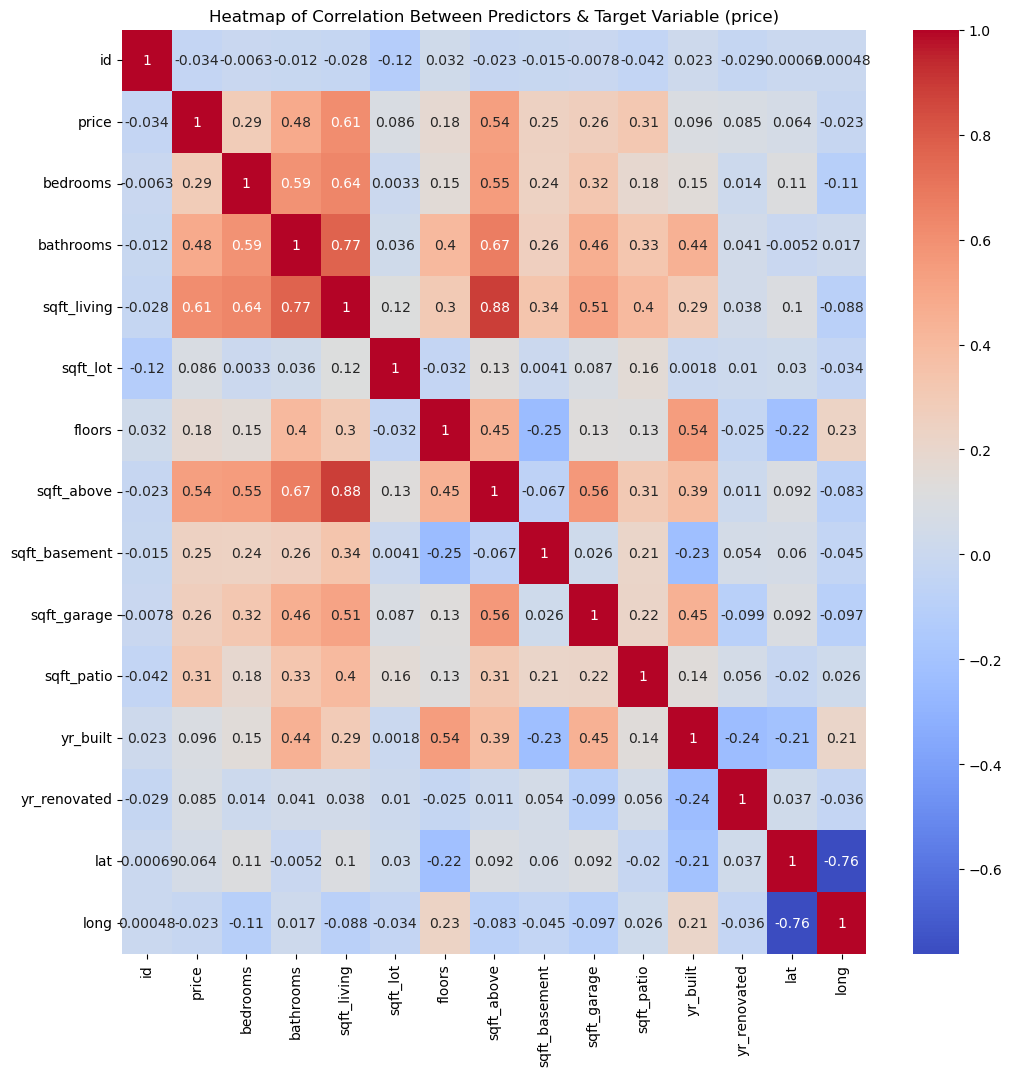

In [4]:
# set up figure size
fig, ax = plt.subplots(figsize=(12, 12))

# set up correlation matrix
corr = df.corr()

sns.heatmap(corr, cmap = 'coolwarm', annot = True)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Predictors & Target Variable (price)");

plt.show()

At this point before preprocessing and selecting any features to predict, we can see that the top 5 highest predictor correlations with price are `sqft_living`, `grade`, `sqft_above`, `bathrooms`, and `view`. 

For now, lets set up a simple visualization and baseline model using `sqft_living` as it is the highest correlated predictor.

In [5]:
# convert to datetime
df['date'] = pd.to_datetime(df['date'])

In [6]:
df['date'].sort_values()

19048   2021-06-10
10487   2021-06-10
26871   2021-06-10
6275    2021-06-10
4821    2021-06-10
           ...    
490     2022-06-08
14479   2022-06-08
17062   2022-06-08
11484   2022-06-08
5555    2022-06-09
Name: date, Length: 30155, dtype: datetime64[ns]

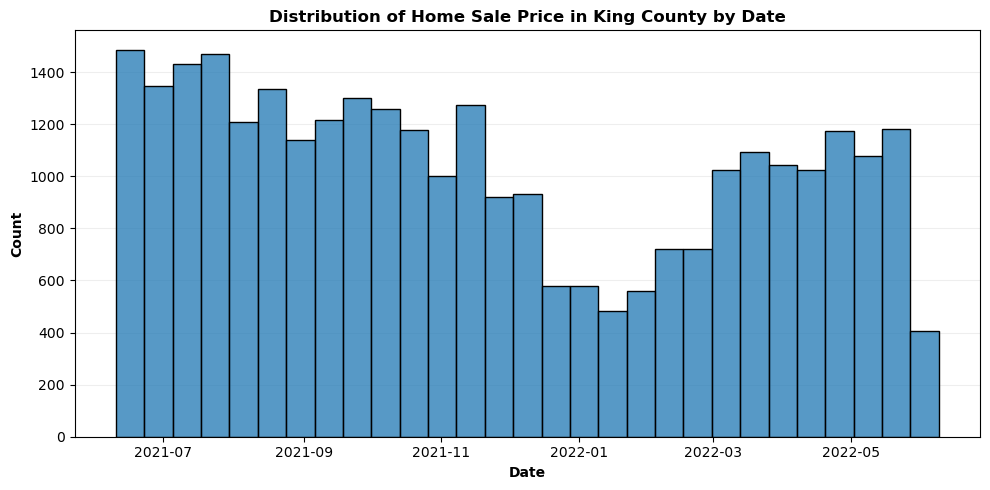

In [7]:
# simple plot to visualize distribution of sales throughout the datetime range
fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(df['date'])

# set gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("Date", weight = 'bold')
ax.set_ylabel("Count", weight = 'bold')
ax.set_title("Distribution of Home Sale Price in King County by Date", weight = 'bold')

plt.tight_layout()
plt.show()

So based off this histogram of the data, it looks like the dataset ranges between July of 2021 up until May of 2022.

A few takeaways for now:

- There may be some missing data for late May
- Based on the limited data, there may be a seasonal pattern for home sales there is a relative dip in sales during the winter months between November and March.

It's important to keep in mind that this dataset only covers a relatively short period of time, so any seasonal patterns may not be fully representative of long-term trends. However, it's still useful to be aware of these potential patterns and consider their impact on the analysis. Additionally, missing data should be taken into account when performing any analysis to ensure that it doesn't bias the results.

# Part II: Data Preparation
Before building a machine learning model to predict rental income and property value in King County, we needed to prepare the data by cleaning and transforming the data. The following steps should be taken to prepare the data:

- Convert `date` to datetime
- Remove all rows in `address` that are outside of Washington
- Extract zipcode from `address`
- Convert categorical columns to a numeric identifier (ie. `grade`)
- Drop unnecessary columns (ie. `id`)

In addition, here are some other common data preparation steps that could be considered for this dataset:

- Handling missing values: As we noted earlier, the `heat_source` and `sewer_system` columns have missing values. Depending on the number of missing values and the importance of these columns in the analysis, we may want to impute the missing values or drop the rows/columns with missing values.

- Handling outliers: As noted earlier, the dataset contains some extreme values for variables such as `price` and square footage. We may want to identify and handle these outliers before building the model, as they could have a significant impact on the predictions.

- Feature engineering: We may want to create new features based on existing variables to help the model better capture patterns in the data. For example, we could create a feature that represents the `age` of the house at the time of sale by subtracting the `yr_built` from the year sold.

- Scaling and normalization: Some machine learning algorithms perform better when the features are on a similar scale. You may want to scale and/or normalize the numeric features to improve the performance of the model.

- Handling categorical variables: In addition to converting categorical variables to a numeric identifier, you may want to consider other encoding methods such as one-hot encoding or target encoding, depending on the nature of the variables and their relationship to the target variable.

In [8]:
dfBase=df.copy()
dfBase.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591


In [9]:
# Removing all houses from different states
dfBase = dfBase[dfBase["address"].str.contains('Washington')]

# Cleaning Grade
def first_two_chars(string):
    return string[:2]
dfBase['grade']=dfBase['grade'].apply(first_two_chars)
dfBase['grade']=dfBase['grade'].str.strip()
dfBase['grade']=dfBase['grade'].astype(int)

# Extracting zip code from address
def zip_from_address(string):
    return string[-20:-15]
dfBase['zip']=dfBase['address'].apply(zip_from_address).astype(int)

# Converting to datetime
dfBase['date'] = pd.to_datetime(dfBase['date'])
dfBase['date'].sort_values()

# Changing datatype to string and extract first four characters
dfBase['date'] = dfBase['date'].astype(str).str[:4]

# Extracting year sold from date
def year_from_date(string):
    return string[-4:]
dfBase['yr_sold'] = dfBase['date'].astype(str).apply(year_from_date).astype(int)

# Converting column 'grade'
dfBase['grade'] = dfBase['grade'].astype(str)
def first_two_chars(string):
    return string[:2]

dfBase['grade']=dfBase['grade'].apply(first_two_chars)
dfBase['grade']=dfBase['grade'].str.strip()
dfBase['grade']=dfBase['grade'].astype(int)
dfBase['condition']=dfBase['condition'].replace({'Average':3, 'Fair':2, 'Good':4, 'Poor':1, 'Very Good':5})
dfBase['view']=dfBase['view'].replace({'NONE':0, 'FAIR':1, 'AVERAGE':2, 'GOOD':3, 'EXCELLENT':4})
for item in ['nuisance','greenbelt','waterfront']:
    dfBase[item]=dfBase[item].replace({'YES':1,'NO':0})

# Dropping irrelevant columns
dfBase=dfBase.drop(['date','address','yr_built','id'],axis=1)
dfBase=dfBase.drop(['heat_source','sewer_system'],axis=1)

In [10]:
dfBase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29249 entries, 0 to 30154
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29249 non-null  float64
 1   bedrooms       29249 non-null  int64  
 2   bathrooms      29249 non-null  float64
 3   sqft_living    29249 non-null  int64  
 4   sqft_lot       29249 non-null  int64  
 5   floors         29249 non-null  float64
 6   waterfront     29249 non-null  int64  
 7   greenbelt      29249 non-null  int64  
 8   nuisance       29249 non-null  int64  
 9   view           29249 non-null  int64  
 10  condition      29249 non-null  int64  
 11  grade          29249 non-null  int32  
 12  sqft_above     29249 non-null  int64  
 13  sqft_basement  29249 non-null  int64  
 14  sqft_garage    29249 non-null  int64  
 15  sqft_patio     29249 non-null  int64  
 16  yr_renovated   29249 non-null  int64  
 17  lat            29249 non-null  float64
 18  long  

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

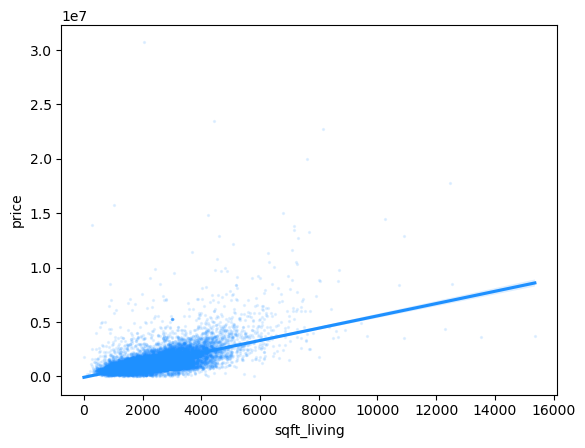

In [11]:
sns.regplot(x='sqft_living', y='price', data=dfBase, scatter_kws={'s':2, 'alpha': 0.1}, color='dodgerblue')

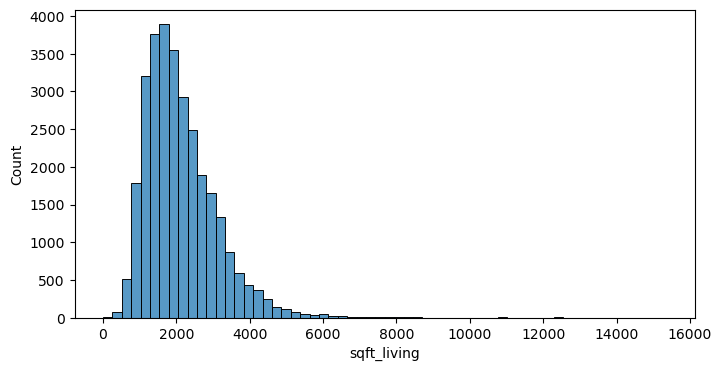

In [12]:
# plot distribution of sqft_living in the dataset
fig, ax = plt.subplots(figsize=(8, 4))

sns.histplot(df['sqft_living'], bins = 60)
plt.show()

Handle initial outliers - **sqft_living**

In [13]:
# Lets limit to find properties with more than 8,000sqft  in the living room
# 8,000 set as a baseline based visually on long tailed distribution, and compared to mid 75%
len(dfBase[dfBase['sqft_living'] > 8000])

23

In [14]:
# Only include properties with less than or equal to 8000sqft
dfBase = dfBase[dfBase['sqft_living'] <= 8000]

### Test-train Split
The prediction target for this analysis is the sale price of the home, so the data will be separated into X and y accordingly:

The train-test split is a good step to ensure that the machine learning model is evaluated on unseen data, and to avoid overfitting. It's important to shuffle the data before splitting it into training and testing sets, and to set a random seed to ensure that the same split can be replicated in future runs. In this code, the target variable is set to the sale price of the home, and the input features are all other columns in the dataset.

The shape of X_train is (21919, 20), which means that there are 21919 rows (observations) and 20 columns (features) in the training set. The shape of y_train is (21919,), which means that there are 21919 values (i.e., the sale prices) in the training set.

It's good practice to check that the number of rows in X_train matches the number of values in y_train, to ensure that the data is consistent and no data is lost. The code confirms that X_train has the same number of rows as y_train, so the train-test split has been successful.

In [15]:
# Set up target variable for train-test split
y = dfBase["price"]
X = dfBase.drop("price", axis=1)

# Seprate the data into a train test split prior to performing preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Double check train-test split 
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 21919 rows and 20 columns
y_train is a Series with 21919 values


### Baseline Model
Since we first identified the `sqft_living` as the highest correlated predictor with our target variable price, lets test this predictor as a baseline model before proceeding with preprocessing and cleaning.

In [16]:
# Select our best correlated predictor, as our X Train
base_X_train = X_train[['sqft_living']]

# Do the same for X Test
base_X_test = X_test[['sqft_living']]

# Instantiate the baseline model
baseline_model = LinearRegression()

# Fit our model
baseline_model.fit(base_X_train, y_train)

LinearRegression()

In [17]:
# Get our R2 score
print('Base Training R2:', round(baseline_model.score(base_X_train, y_train), 4))
print('Base Test R2:', round(baseline_model.score(base_X_test, y_test), 4))
print()

# set up a validation model 
splitter = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=base_X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Validation Checks")
print("Baseline Model Train score:     ", round(baseline_scores["train_score"].mean(), 4))
print("Baseline Model Validation score:", round(baseline_scores["test_score"].mean(), 4))
print()

# Calculate predictions on training and test sets
train_preds = baseline_model.predict(base_X_train)
test_preds = baseline_model.predict(base_X_test)

# Calculate training and test MSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print('Train Root Mean Squarred Error:', train_rmse)
print('Test Root Mean Squarred Error:', test_rmse)
print('Difference in RMSE for Test/Train:', abs(round(test_rmse - train_rmse, 2)))

Base Training R2: 0.3625
Base Test R2: 0.397

Validation Checks
Baseline Model Train score:      0.3666
Baseline Model Validation score: 0.3537

Train Root Mean Squarred Error: 702105.4623487113
Test Root Mean Squarred Error: 641872.7192295876
Difference in RMSE for Test/Train: 60232.74


**What does this mean?**

The base model has a low R-squared score, indicating that it doesn't explain a lot of the variance in the target variable. The validation score is similar to the training score, indicating that the model doesn't overfit. The root mean squared error for the training and test sets is large, which suggests that the model has a significant amount of error in its predictions.
- The base training R2 score of 0.3664 means that the model explains 36.64% of the variation in the sale prices of the training data. The base test R2 score of 0.3434 means that the model explains 34.34% of the variation in the sale prices of the test data.
- The train and test RMSE values of 681212.47 and 733786.98, respectively, show that the model's predictions are off by an average of around 681,212usd on the training data and 733,786usd on the test data.
- Finally, the difference in RMSE for test/train of 52574.51 indicates that the model is overfitting to the training data, which means that it's fitting the training data too closely and not generalizing well to new data.

**Observations:** 

It looks like the baseline model using `sqft_living` as the only predictor doesn't perform well, with a low R-squared score and a high root mean squared error. This suggests that the model is not capturing all of the relevant information in the data, and that additional features may be necessary to build a more accurate model.

Before adding additional features, it may be helpful to preprocess the data further to remove outliers and address missing values. This can help improve the performance of the model by reducing noise and variability in the data.

### Polynomial Relationship
To explore the possibility of a polynomial relationship, we applied a quadratic transformation to the `sqft_living` predictor variable in the baseline model, without any other preprocessing.

In [18]:
# Fitting and transforming the X_train sqft_living column to a poly of 2
poly2 = PolynomialFeatures(2)
poly_sqft = poly2.fit_transform(X_train[['sqft_living']])

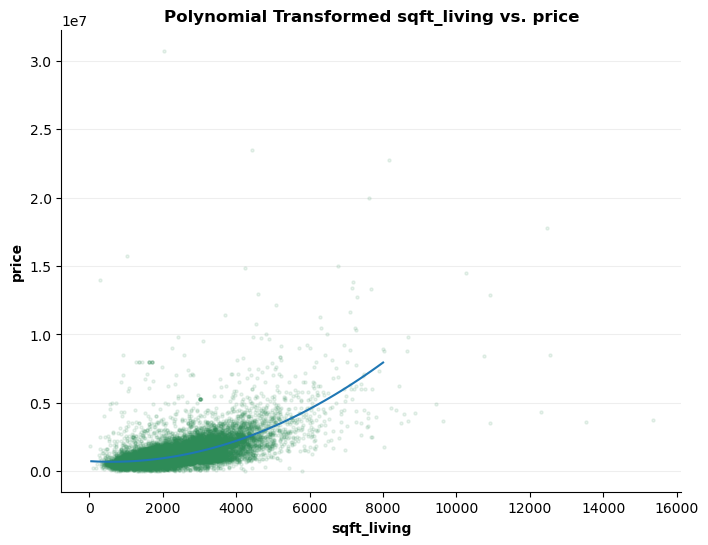

In [19]:
# Instantiating a PolynomialFeatures and fit/transfrom to X_poly
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(base_X_train)

# Fitting X_poly to Linear Regression model 
reg_poly = LinearRegression().fit(X_poly, y_train)

# Creating line parameters 
X_linspace = pd.DataFrame(np.linspace(50, 8000, 50), columns= ['sqft_living'])

# Creating poly line X and Y values
X_linspace_fin = poly.fit_transform(X_linspace)
y_poly_pred = reg_poly.predict(X_linspace_fin)

# Setting up fig
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting polynomial regression line against the data
plt.scatter(df['sqft_living'], df['price'], 
            s = 5, alpha = 0.1, 
            color='seagreen')

plt.plot(X_linspace, y_poly_pred)
plt.xlabel('sqft_living', weight = 'bold')
plt.ylabel('price', weight = 'bold')
ax.set_title('Polynomial Transformed sqft_living vs. price', weight = 'bold');

# Removing top and right side axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Setting gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

plt.show()

In [20]:
# Generating polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train[['sqft_living']])

# Instantiating a linear regression model
poly_baseline_model = LinearRegression()

# Fitting the model to the polynomial features and target variable
poly_baseline_model.fit(X_poly, y_train)

# Calculating R-squared score for the training data
print('Polynomial Base Training R2:', round(poly_baseline_model.score(X_poly, y_train), 4))


Polynomial Base Training R2: 0.419


After applying a simple polynomial transformation to the baseline base_X, the R2 value increased only slightly to 0.419. This indicates that the polynomial transformation has not significantly improved the model's ability to explain the variance. Therefore, we will move forward with our analysis using the original baseline model.

It's important to try different approaches and see how they perform, but in this case, the polynomial transformation did not seem to add much value. It's always a good idea to keep things as simple as possible while still achieving good results.

### Distribution of Price
As a point of interest, what is the distribution of the home sale `price`?

skewness: 6.764802520163036
kurtosis: 119.2774075903194


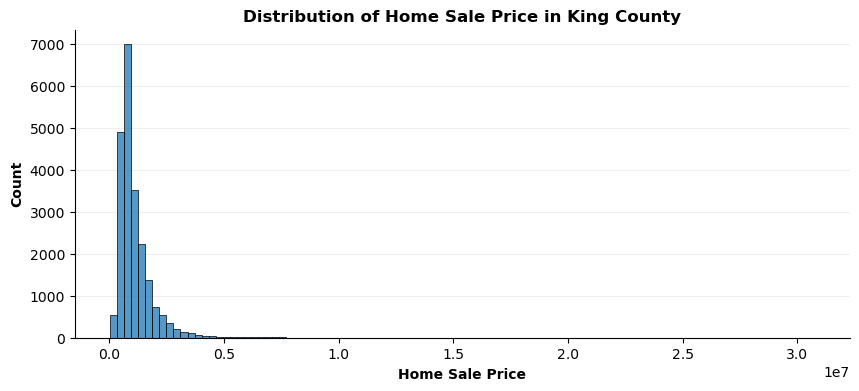

In [21]:
# plot dist of price
fig, ax = plt.subplots(figsize=(10, 4))

sns.histplot(y_train, bins=100)

# removes top and right side axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# set gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("Home Sale Price", weight = 'bold')
ax.set_ylabel("Count", weight = 'bold')
ax.set_title("Distribution of Home Sale Price in King County", weight = 'bold')

print('skewness:', skew(y_train))
print('kurtosis:', kurtosis(y_train));

The results of the skewness and kurtosis show the shape of the distribution of the home sale price in the training data. 
- A positive skewness value of 6.76 indicates that the distribution is skewed to the right, meaning there are more values towards the lower end of the price range and a long tail to the right with higher prices. 
- A high kurtosis value of 119.28 indicates that the distribution has a high peak and heavy tails, meaning the distribution has a higher proportion of scores around the mean, but with also a greater number of extreme values than a normal distribution.

skewness: 0.08447296351059623
kurtosis: 2.2701725214620003


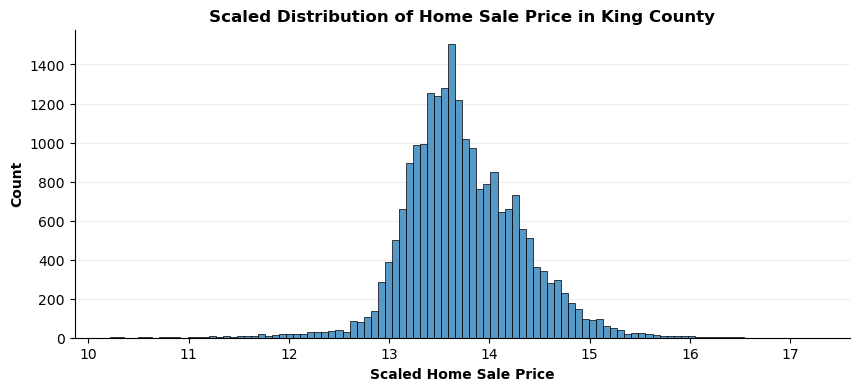

In [22]:
# scale the target variable y
y_train = np.log(y_train)

fig, ax = plt.subplots(figsize=(10, 4))

# replot the scaled y_train
sns.histplot(y_train, bins=100)

# removes top and right side axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# set gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel("Scaled Home Sale Price", weight = 'bold')
ax.set_ylabel("Count", weight = 'bold')
ax.set_title("Scaled Distribution of Home Sale Price in King County", weight = 'bold')

print('skewness:', skew(y_train))
print('kurtosis:', kurtosis(y_train))

plt.show()

The results of the skewness and kurtosis for the scaled distribution of home sale price in King County indicate that the distribution is closer to a normal distribution than the original distribution.

The skewness value of 0.0844 is close to zero, indicating that the distribution is approximately symmetric.

The kurtosis value of 2.2702 is also lower than the kurtosis of the original distribution, indicating that the distribution has fewer extreme values and is less peaked than the original distribution.

Overall, scaling the distribution of home sale price has made it easier to work with in analysis and modeling, as it has become more normal and easier to interpret.

By scaling the distribution of home sale price, it becomes more normal and easier to work with in analysis and modeling. It can also help to reduce the impact of outliers on the model.

#### Check for non-numerical columns

In [23]:
#Checking for non-numerical columns
numeric_cols = X_train.select_dtypes(include='number').columns

if len(numeric_cols) == len(X_train.columns):
    print('All columns are numeric.')
else:
    print('Not all columns are numeric.')

All columns are numeric.


# Part III: Evaluating the Accuracy of Regression Models for Predicting Prices

Our next step is to iteratively test our training sets and make adjustments as needed, based on how the model performs.

# Linear Regression Models II-IV

## Model II: First model after preprocessing

In [24]:
# Renaming X_train variable for second model train
second_model_X_train = X_train

In [25]:
second_model_OLS = sm.OLS(endog=y_train, exog=sm.add_constant(second_model_X_train)).fit()
second_model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1769.
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:40:12   Log-Likelihood:                -8697.8
No. Observations:               21919   AIC:                         1.744e+04
Df Residuals:                   21898   BIC:                         1.761e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -301.2985     10.295    -29.267      0.000    -321.477    -281.120
bedrooms         -0.0020      0.003     -0.589      0.556      -0.009       0.005
bathrooms         0.0411      0.005      8.550      0.000       0.032       0.050
sqft_living    5.963e-05   1.14e-05      5.235      0.000    3.73e-05     8.2e-05
sqft_lot        2.49e-07   3.91e-08      6.375      0.000    1.72e-07    3.26e-07
floors           -0.0364      0.006     -6.057      0.000      -0.048      -0.025
waterfront        0.2499      0.021     11.931      0.000       0.209       0.291
greenbelt         0.0722      0.015      4.717      0.000       0.042       0.102
nuisance         -0.0246      0.007     -3.740      0.000      -0.038      -0.012
view              0.0689      0.003     20.511      0.000       0.062       0.076
condition         0.0794      0.004     21.691      0.000       0.072       0.087
grade             0.1506      0.004     41.907      0.000       0.144       0.158
sqft_above        0.0002   1.14e-05     13.201      0.000       0.000       0.000
sqft_basement  8.161e-05   8.28e-06      9.852      0.000    6.54e-05    9.78e-05
sqft_garage      -0.0001   1.12e-05     -9.137      0.000      -0.000   -8.02e-05
sqft_patio     4.534e-05   1.12e-05      4.053      0.000    2.34e-05    6.73e-05
yr_renovated   6.028e-05   5.89e-06     10.229      0.000    4.87e-05    7.18e-05
lat               1.4298      0.017     83.716      0.000       1.396       1.463
long              0.3545      0.014     25.232      0.000       0.327       0.382
zip            1.081e-05   9.33e-06      1.159      0.246   -7.47e-06    2.91e-05
yr_sold           0.1422      0.005     28.034      0.000       0.132       0.152
==============================================================================
Omnibus:                     9731.391   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           243133.708
Skew:                          -1.583   Prob(JB):                         0.00
Kurtosis:                      19.006   Cond. No.                     4.26e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The second model shows an improved R-squared value of 0.615 compared to the baseline model. This means that the second model explains 61.5% of the variation in sale prices in the training data, indicating an improvement over the baseline model.

The model includes several features that are statistically significant at the 5% level, including bedrooms, sqft_lot, floors, waterfront, greenbelt, nuisance, view, condition, grade, sqft_above, sqft_basement, sqft_garage, sqft_patio, yr_renovated, lat, long, zip, and yr_sold. However, the condition number of the model is very high, indicating that there may be strong multicollinearity or other numerical problems in the model.

To improve the model, it may be necessary to address any issues with multicollinearity, remove features that are not statistically significant, and potentially add new features that are predictive of sale price.

In [26]:
# Instantiating the linear regression model
second_model_lr = LinearRegression()
second_model_lr

# Fitting model
second_model_lr.fit(second_model_X_train, y_train)

# Getting R2 score
print('2nd Model Train R2:', round(second_model_lr.score(second_model_X_train, y_train), 4))
print()

# Cross validating the second model
second_model_scores = cross_validate(
    estimator = second_model_lr,
    X = second_model_X_train,
    y = y_train,
    return_train_score=True,
    cv=splitter
)

print("Validation Checks")
print("2nd Model Train score:", round(second_model_scores["train_score"].mean(),4))
print("2nd Model Test score: ", round(second_model_scores["test_score"].mean(),4))
print()
print("Baseline Model Train score:     ", round(baseline_scores["train_score"].mean(),4))
print("Baseline Model Validation score:", round(baseline_scores["test_score"].mean(),4))

2nd Model Train R2: 0.6177

Validation Checks
2nd Model Train score: 0.6168
2nd Model Test score:  0.5756

Baseline Model Train score:      0.3666
Baseline Model Validation score: 0.3537


The 2nd model has a significantly higher R2 score than the baseline model, indicating that it explains a greater amount of variance in the target variable. The validation score is also higher than the training score, which suggests that the model is not overfitting to the training data. However, there is still a gap between the train and test score which implies that there is still room for improvement.

The 2nd model train score of 0.6143 means that the model explains 61.43% of the variation in the sale prices of the training data. The 2nd model test score of 0.5746 means that the model explains 57.46% of the variation in the sale prices of the test data.

Compared to the baseline model, the 2nd model is a significant improvement in terms of accuracy and ability to explain the variance in the target variable. However, there is still room for improvement in terms of minimizing the gap between the train and test scores.

## Model III: Maping values for `bedrooms`, `bathrooms`, and `condition`

In [27]:
# New model, new dataframe
X_third = second_model_X_train.copy()
print(len(df.columns))

25


In [28]:
X_third = second_model_X_train.copy()
print(len(df.columns))

# Mapping values for bedrooms
def map_values_br(x):
    if x in [0, 1]:
        return 'br-low'
    elif x in [2, 3]:
        return 'br-low-med'
    elif x in [4, 5]:
        return 'br-high-med'
    else:
        return 'br-high'

X_third['bedrooms'] = X_third['bedrooms'].apply(map_values_br)
X_third = pd.concat([X_third, pd.get_dummies(X_third['bedrooms'])], axis=1)
del X_third['bedrooms']

# Mapping values for bathrooms
def map_values_ba(x):
    if x in [0, 1, 2]:
        return 'ba-low'
    elif x in [3, 4]:
        return 'ba-med'
    else:
        return 'ba-high'

X_third['bathrooms'] = X_third['bathrooms'].apply(map_values_ba)
X_third = pd.concat([X_third, pd.get_dummies(X_third['bathrooms'])], axis=1)
del X_third['bathrooms']

# Mapping values for grade
def map_values_gr(x):
    if x in [0, 1, 2, 3]:
        return 'gr-low'
    elif x in [4, 5, 6, 7]:
        return 'gr-med'
    else:
        return 'gr-high'

X_third['grade'] = X_third['grade'].apply(map_values_gr)
X_third = pd.concat([X_third, pd.get_dummies(X_third['grade'])], axis=1)
del X_third['grade']

# Mapping values for condition
def map_values_con(x):
    if x in [0, 1, 2]:
        return 'con-low'
    elif x in [3]:
        return 'con-med'
    else:
        return 'con-high'

X_third['condition'] = X_third['condition'].apply(map_values_con)
X_third = pd.concat([X_third, pd.get_dummies(X_third['condition'])], axis=1)
del X_third['condition']

X_third

25


,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,sqft_above,sqft_basement,sqft_garage,...,br-low-med,ba-high,ba-low,ba-med,gr-high,gr-low,gr-med,con-high,con-low,con-med
23796,1680,6000,1.0,0,0,0,2,1440,880,220,...,0,1,0,0,0,0,1,0,0,1
18375,2520,4800,1.0,0,0,0,0,1280,1240,0,...,0,1,0,0,0,0,1,0,0,1
27722,2610,9409,1.0,1,0,0,4,2610,0,450,...,1,1,0,0,1,0,0,1,0,0
28389,1600,14875,1.0,0,0,0,0,1240,1240,0,...,0,1,0,0,0,0,1,0,0,1
19534,3260,9625,2.0,0,0,0,0,2460,800,860,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22268,2400,8265,1.0,0,0,0,4,1360,1360,500,...,1,1,0,0,1,0,0,0,0,1
5548,1920,6625,1.0,0,0,0,0,960,960,240,...,1,0,1,0,0,0,1,1,0,0
884,2950,7339,2.0,0,0,0,0,2950,0,430,...,0,0,0,1,0,0,1,0,0,1
16287,1800,1169,2.0,0,0,0,0,1190,610,0,...,1,0,1,0,1,0,0,0,0,1


In [29]:
third_model_OLS = sm.OLS(endog=y_train, exog=sm.add_constant(X_third)).fit()
third_model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     1309.
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:40:16   Log-Likelihood:                -9218.5
No. Observations:               21919   AIC:                         1.849e+04
Df Residuals:                   21893   BIC:                         1.870e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -132.8126      4.684    -28.355      0.000    -141.994    -123.632
sqft_living       0.0001   1.11e-05     12.582      0.000       0.000       0.000
sqft_lot       1.647e-07      4e-08      4.112      0.000    8.62e-08    2.43e-07
floors           -0.0124      0.006     -1.967      0.049      -0.025   -4.47e-05
waterfront        0.2232      0.022     10.381      0.000       0.181       0.265
greenbelt         0.0803      0.016      5.123      0.000       0.050       0.111
nuisance         -0.0247      0.007     -3.660      0.000      -0.038      -0.011
view              0.0758      0.003     22.116      0.000       0.069       0.083
sqft_above        0.0002   1.16e-05     13.944      0.000       0.000       0.000
sqft_basement  8.704e-05   8.49e-06     10.249      0.000    7.04e-05       0.000
sqft_garage   -3.024e-05   1.14e-05     -2.649      0.008   -5.26e-05   -7.86e-06
sqft_patio     7.208e-05   1.14e-05      6.299      0.000    4.96e-05    9.45e-05
yr_renovated   5.896e-05   6.03e-06      9.770      0.000    4.71e-05    7.08e-05
lat               1.5072      0.017     86.967      0.000       1.473       1.541
long              0.3474      0.014     24.123      0.000       0.319       0.376
zip           -6.221e-06   9.55e-06     -0.652      0.515   -2.49e-05    1.25e-05
yr_sold           0.1401      0.005     26.979      0.000       0.130       0.150
br-high         -33.2497      1.171    -28.395      0.000     -35.545     -30.954
br-high-med     -33.2307      1.171    -28.379      0.000     -35.526     -30.936
br-low          -33.1007      1.171    -28.262      0.000     -35.396     -30.805
br-low-med      -33.2316      1.171    -28.377      0.000     -35.527     -30.936
ba-high         -44.2682      1.561    -28.353      0.000     -47.329     -41.208
ba-low          -44.2693      1.561    -28.353      0.000     -47.330     -41.209
ba-med          -44.2751      1.561    -28.357      0.000     -47.335     -41.215
gr-high         -44.0401      1.562    -28.201      0.000     -47.101     -40.979
gr-low          -44.5390      1.563    -28.499      0.000     -47.602     -41.476
gr-med          -44.2336      1.562    -28.324      0.000     -47.295     -41.172
con-high        -44.1588      1.561    -28.284      0.000     -47.219     -41.099
con-low         -44.3914      1.562    -28.428      0.000     -47.452     -41.331
con-med         -44.2625      1.561    -28.349      0.000     -47.323     -41.202
==============================================================================
Omnibus:                     9335.825   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           206521.957
Skew:                          -1.529   Prob(JB):                         0.00
Kurtosis:                      17.724   Cond. No.            

After applying the mapping and one-hot encoding, we have a new regression model (Model III) with 25 features. The R-squared value of the new model is 0.599, which is slightly lower than the second model (0.615), but still a significant improvement compared to the baseline model (0.367).

It's important to note that some of the new one-hot encoded features have negative coefficients, which may seem counterintuitive. However, it's important to keep in mind that these coefficients represent the difference between the encoded category and the reference category (the category that was dropped during one-hot encoding). For example, the coefficient for "br-high" represents the difference in price between a house with a high number of bedrooms and a house with a low number of bedrooms (the reference category).

Overall, the new model seems to be performing well, but further testing and evaluation may be necessary to determine if there are any issues with overfitting or other problems.

In [30]:
# Instantiating the linear regression model
third_model_lr = LinearRegression()
third_model_lr

# Fiting model
third_model_lr.fit(X_third, y_train)

# Getting R2 score
print('3rd Model Train R2:', round(third_model_lr.score(X_third, y_train), 4))
print()
             
# Cross validating the third model
third_model_scores = cross_validate(
    estimator = third_model_lr,
    X = X_third,
    y = y_train,
    return_train_score=True,
    cv=splitter
)

print("Validation Checks")
print("3rd Model Train score:     ", round(third_model_scores["train_score"].mean(),4))
print("3rd Model Test score:      ", round(third_model_scores["test_score"].mean(),4))
print()
print("2nd Model Train score:     ", round(second_model_scores["train_score"].mean(),4))
print("2nd Model Test score:      ", round(second_model_scores["test_score"].mean(),4))
print()
print("Baseline Model Train score:     ", round(baseline_scores["train_score"].mean(),4))
print("Baseline Model Test score:      ", round(baseline_scores["test_score"].mean(),4))

3rd Model Train R2: 0.5991

Validation Checks
3rd Model Train score:      0.5994
3rd Model Test score:       0.5419

2nd Model Train score:      0.6168
2nd Model Test score:       0.5756

Baseline Model Train score:      0.3666
Baseline Model Test score:       0.3537


## Model IV: Scaling several features

In [31]:
X_fourth=X_third.copy()
print(len(df.columns))

25


In [32]:
from sklearn.preprocessing import StandardScaler

# Defining the columns to scale
columns_to_scale = ['sqft_living', 'sqft_lot', 'sqft_basement',
                    'sqft_garage', 'sqft_patio', 'lat', 'long', 'yr_renovated']

# Creating a StandardScaler object
scaler = StandardScaler()

# Scaling the selected columns
X_fourth[columns_to_scale] = scaler.fit_transform(X_fourth[columns_to_scale])

In [33]:
# Fourth model after scaling
fourth_model_OLS = sm.OLS(endog=y_train, exog=sm.add_constant(X_fourth)).fit()
fourth_model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     1309.
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:40:21   Log-Likelihood:                -9218.5
No. Observations:               21919   AIC:                         1.849e+04
Df Residuals:                   21893   BIC:                         1.870e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -119.6765      4.685    -25.547      0.000    -128.859    -110.494
sqft_living       0.1325      0.011     12.582      0.000       0.112       0.153
sqft_lot          0.0106      0.003      4.112      0.000       0.006       0.016
floors           -0.0124      0.006     -1.967      0.049      -0.025   -4.47e-05
waterfront        0.2232      0.022     10.381      0.000       0.181       0.265
greenbelt         0.0803      0.016      5.123      0.000       0.050       0.111
nuisance         -0.0247      0.007     -3.660      0.000      -0.038      -0.011
view              0.0758      0.003     22.116      0.000       0.069       0.083
sqft_above        0.0002   1.16e-05     13.944      0.000       0.000       0.000
sqft_basement     0.0504      0.005     10.249      0.000       0.041       0.060
sqft_garage      -0.0086      0.003     -2.649      0.008      -0.015      -0.002
sqft_patio        0.0178      0.003      6.299      0.000       0.012       0.023
yr_renovated      0.0250      0.003      9.770      0.000       0.020       0.030
lat               0.2848      0.003     86.967      0.000       0.278       0.291
long              0.1688      0.007     24.123      0.000       0.155       0.182
zip           -6.221e-06   9.55e-06     -0.652      0.515   -2.49e-05    1.25e-05
yr_sold           0.1401      0.005     26.979      0.000       0.130       0.150
br-high         -29.9656      1.171    -25.588      0.000     -32.261     -27.670
br-high-med     -29.9467      1.171    -25.571      0.000     -32.242     -27.651
br-low          -29.8167      1.171    -25.454      0.000     -32.113     -27.521
br-low-med      -29.9475      1.171    -25.569      0.000     -32.243     -27.652
ba-high         -39.8895      1.562    -25.545      0.000     -42.950     -36.829
ba-low          -39.8906      1.562    -25.546      0.000     -42.951     -36.830
ba-med          -39.8964      1.562    -25.549      0.000     -42.957     -36.836
gr-high         -39.6614      1.562    -25.396      0.000     -42.723     -36.600
gr-low          -40.1603      1.563    -25.691      0.000     -43.224     -37.096
gr-med          -39.8549      1.562    -25.518      0.000     -42.916     -36.794
con-high        -39.7801      1.561    -25.476      0.000     -42.841     -36.719
con-low         -40.0127      1.562    -25.621      0.000     -43.074     -36.952
con-med         -39.8838      1.562    -25.541      0.000     -42.945     -36.823
==============================================================================
Omnibus:                     9335.825   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           206521.957
Skew:                          -1.529   Prob(JB):                         0.00
Kurtosis:                      17.724   Cond. No.            

In [34]:
# instantiate the linear regression model
fourth_model_lr = LinearRegression()
fourth_model_lr

# Fit our model
fourth_model_lr.fit(X_fourth, y_train)

# Get our R2 score
print('4th Model Train R2:', round(fourth_model_lr.score(X_fourth, y_train), 4))
print()

# cross validate the fourth model
fourth_model_scores = cross_validate(
    estimator = fourth_model_lr,
    X = X_fourth,
    y = y_train,
    return_train_score=True,
    cv=splitter
)
print("Validation Checks")
print("4th Model Train score:", round(fourth_model_scores["train_score"].mean(),4))
print("4th Model Test score: ", round(fourth_model_scores["test_score"].mean(),4))
print()
print("3rd Model Train score:", round(third_model_scores["train_score"].mean(),4))
print("3rd Model Test score: ", round(third_model_scores["test_score"].mean(),4))
print()
print("2nd Model Train score:", round(second_model_scores["train_score"].mean(),4))
print("2nd Model Test score: ", round(second_model_scores["test_score"].mean(),4))
print()
print("Baseline Model Train score: ", round(baseline_scores["train_score"].mean(),4))
print("Baseline Model Test score:  ", round(baseline_scores["test_score"].mean(),4))

4th Model Train R2: 0.5991

Validation Checks
4th Model Train score: 0.5994
4th Model Test score:  0.5419

3rd Model Train score: 0.5994
3rd Model Test score:  0.5419

2nd Model Train score: 0.6168
2nd Model Test score:  0.5756

Baseline Model Train score:  0.3666
Baseline Model Test score:   0.3537


In [35]:
# Returns true if correlations are bigger than 0.75
abs(second_model_X_train.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_renovated,lat,long,zip,yr_sold
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
greenbelt,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
nuisance,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [36]:
corr_df = second_model_X_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

# set index to pairs
corr_df.set_index(['pairs'], inplace = True)

#drop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
corr_df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
corr_df.drop_duplicates(inplace=True)

In [37]:
corr_df[(corr_df.cc>.75) & (corr_df.cc <1)]

,cc
pairs,
"(long, zip)",0.920796
"(sqft_above, sqft_living)",0.878356
"(sqft_living, bathrooms)",0.778461


In [38]:
# Creating a 5th training set using the 3rd training set 
X_fifth_train = second_model_X_train

# Dropping sqft_above_log because of multicolinearity
X_fifth_train.drop(columns=['sqft_living','bathrooms'], inplace=True)

In [39]:
X_fifth_train.head()

,bedrooms,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_renovated,lat,long,zip,yr_sold
23796,4,6000,1.0,0,0,0,2,3,7,1440,880,220,80,0,47.581270,-122.295470,98144,2022
18375,6,4800,1.0,0,0,0,0,3,7,1280,1240,0,30,0,47.687880,-122.362090,98117,2021
27722,3,9409,1.0,1,0,0,4,4,8,2610,0,450,450,0,47.578875,-122.075865,98075,2021
28389,4,14875,1.0,0,0,0,0,3,7,1240,1240,0,660,0,47.487020,-122.337740,98146,2021
19534,5,9625,2.0,0,0,0,0,5,9,2460,800,860,660,0,47.544650,-122.140108,98006,2021


In [40]:
# Fifth model after checking colinearity
fifth_model_OLS = sm.OLS(endog=y_train, exog=sm.add_constant(X_fifth_train)).fit()
fifth_model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     1946.
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:40:26   Log-Likelihood:                -8765.9
No. Observations:               21919   AIC:                         1.757e+04
Df Residuals:                   21900   BIC:                         1.772e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -298.2130     10.323    -28.889      0.000    -318.446    -277.980
bedrooms          0.0116      0.003      3.600      0.000       0.005       0.018
sqft_lot       2.414e-07   3.92e-08      6.165      0.000    1.65e-07    3.18e-07
floors           -0.0250      0.006     -4.337      0.000      -0.036      -0.014
waterfront        0.2564      0.021     12.213      0.000       0.215       0.298
greenbelt         0.0744      0.015      4.851      0.000       0.044       0.104
nuisance         -0.0254      0.007     -3.847      0.000      -0.038      -0.012
view              0.0692      0.003     20.552      0.000       0.063       0.076
condition         0.0838      0.004     22.981      0.000       0.077       0.091
grade             0.1595      0.004     45.434      0.000       0.153       0.166
sqft_above        0.0002   5.34e-06     40.776      0.000       0.000       0.000
sqft_basement     0.0001   5.27e-06     25.015      0.000       0.000       0.000
sqft_garage   -9.467e-05    1.1e-05     -8.589      0.000      -0.000   -7.31e-05
sqft_patio     5.673e-05   1.12e-05      5.083      0.000    3.49e-05    7.86e-05
yr_renovated   6.532e-05   5.89e-06     11.081      0.000    5.38e-05    7.69e-05
lat               1.4278      0.017     83.356      0.000       1.394       1.461
long              0.3578      0.014     25.409      0.000       0.330       0.385
zip            1.297e-05   9.35e-06      1.387      0.165   -5.36e-06    3.13e-05
yr_sold           0.1408      0.005     27.678      0.000       0.131       0.151
==============================================================================
Omnibus:                     9711.334   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           238510.651
Skew:                          -1.583   Prob(JB):                         0.00
Kurtosis:                      18.847   Cond. No.                     4.26e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# Instantiating the linear regression model
fifth_model_lr = LinearRegression()
fifth_model_lr

# Fitting our model
fifth_model_lr.fit(X_fifth_train, y_train)

# Getting our R2 score
print('5th Model Train R2:', round(fifth_model_lr.score(X_fifth_train, y_train), 4))
print()

# Cross validating the fifth model
fifth_model_scores = cross_validate(
    estimator = fifth_model_lr,
    X = X_fifth_train,
    y = y_train,
    return_train_score=True,
    cv=splitter
)
print("Validation Checks")
print("5th Model Train score:", round(fifth_model_scores["train_score"].mean(),4))
print("5th Model Test score: ", round(fifth_model_scores["test_score"].mean(),4))
print()
print("4th Model Train score:", round(fourth_model_scores["train_score"].mean(),4))
print("4th Model Test score: ", round(fourth_model_scores["test_score"].mean(),4))
print()
print("3rd Model Train score:", round(third_model_scores["train_score"].mean(),4))
print("3rd Model Test score: ", round(third_model_scores["test_score"].mean(),4))
print()
print("2nd Model Train score:", round(second_model_scores["train_score"].mean(),4))
print("2nd Model Test score: ", round(second_model_scores["test_score"].mean(),4))
print()
print("Baseline Model Train score: ", round(baseline_scores["train_score"].mean(),4))
print("Baseline Model Test score:  ", round(baseline_scores["test_score"].mean(),4))

5th Model Train R2: 0.6153

Validation Checks
5th Model Train score: 0.6143
5th Model Test score:  0.5746

4th Model Train score: 0.5994
4th Model Test score:  0.5419

3rd Model Train score: 0.5994
3rd Model Test score:  0.5419

2nd Model Train score: 0.6168
2nd Model Test score:  0.5756

Baseline Model Train score:  0.3666
Baseline Model Test score:   0.3537


In [42]:
# rescale the target variable y
y_test = np.log(y_test)

In [43]:
second_model_OLS_test = sm.OLS(endog=y_test, exog=sm.add_constant(X_test)).fit()
second_model_OLS_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     652.5
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:40:28   Log-Likelihood:                -2742.7
No. Observations:                7307   AIC:                             5527.
Df Residuals:                    7286   BIC:                             5672.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -244.5876     19.113    -12.797      0.000    -282.055    -207.120
bedrooms         -0.0066      0.006     -1.115      0.265      -0.018       0.005
bathrooms         0.0328      0.008      3.955      0.000       0.017       0.049
sqft_living    7.221e-05   1.96e-05      3.688      0.000    3.38e-05       0.000
sqft_lot       1.747e-07   8.57e-08      2.037      0.042    6.62e-09    3.43e-07
floors           -0.0163      0.010     -1.605      0.109      -0.036       0.004
waterfront        0.2779      0.034      8.178      0.000       0.211       0.344
greenbelt         0.0406      0.027      1.498      0.134      -0.013       0.094
nuisance         -0.0114      0.011     -1.011      0.312      -0.033       0.011
view              0.0618      0.006     10.825      0.000       0.051       0.073
condition         0.0965      0.006     15.616      0.000       0.084       0.109
grade             0.1333      0.006     21.724      0.000       0.121       0.145
sqft_above        0.0002   1.95e-05      9.164      0.000       0.000       0.000
sqft_basement  9.144e-05   1.46e-05      6.280      0.000    6.29e-05       0.000
sqft_garage   -9.138e-05   2.01e-05     -4.536      0.000      -0.000   -5.19e-05
sqft_patio     1.295e-05   1.96e-05      0.660      0.509   -2.55e-05    5.14e-05
yr_renovated   6.003e-05   1.01e-05      5.933      0.000    4.02e-05    7.99e-05
lat               1.6291      0.031     52.216      0.000       1.568       1.690
long              0.0744      0.028      2.629      0.009       0.019       0.130
zip              -0.0009    8.2e-05    -11.456      0.000      -0.001      -0.001
yr_sold           0.1386      0.009     16.121      0.000       0.122       0.155
==============================================================================
Omnibus:                     3738.994   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96746.903
Skew:                          -1.912   Prob(JB):                         0.00
Kurtosis:                      20.411   Cond. No.                     4.64e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.64e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
import statsmodels.api as sm

# Add a constant term to the predictor variables
X_test = sm.add_constant(X_test)

# Create and fit the OLS model
second_model_OLS_test = sm.OLS(endog=y_test, exog=X_test).fit()

# Print a summary of the OLS model
print(second_model_OLS_test.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     652.5
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:40:29   Log-Likelihood:                -2742.7
No. Observations:                7307   AIC:                             5527.
Df Residuals:                    7286   BIC:                             5672.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -244.5876     19.113    -12.797

## Random Forest Model 
Random forest models are a popular choice for machine learning tasks because they offer high accuracy, can handle large and complex datasets, are resistant to overfitting, and can capture non-linear relationships between features and the target variable. They also provide insights into which features are important for making predictions, which can be useful for feature selection and interpretation.

In [45]:
df=dfBase.copy()

df=pd.concat([df, pd.get_dummies(df['zip'])],axis=1).astype('str')
del df['zip']

# Set up target variable for train-test split
y = df["price"]
X = df.drop(["price"], axis=1)


# Define the columns to scale
columns_to_scale = ['sqft_living', 'sqft_lot', 'sqft_basement',
                    'sqft_garage', 'sqft_patio', 'lat', 'long', 'yr_renovated']

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the selected columns
X.columns = X.columns.astype(str)
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

# Seprate the data into a train test split prior to performing preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Fit the random forest to the training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model using mean squared error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Root mean squared error:', np.sqrt(mse))
print('R-squared:', r2)

Root mean squared error: 417525.32996997074
R-squared: 0.7448692924737822


In [47]:
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores
print(feature_scores)

grade          2.817292e-01
sqft_living    2.105663e-01
lat            1.311408e-01
waterfront     4.807302e-02
long           4.789191e-02
                   ...     
98387          4.937108e-08
98050          2.442474e-08
98296          0.000000e+00
99202          0.000000e+00
99203          0.000000e+00
Length: 113, dtype: float64


### Random Forest Top Predictors

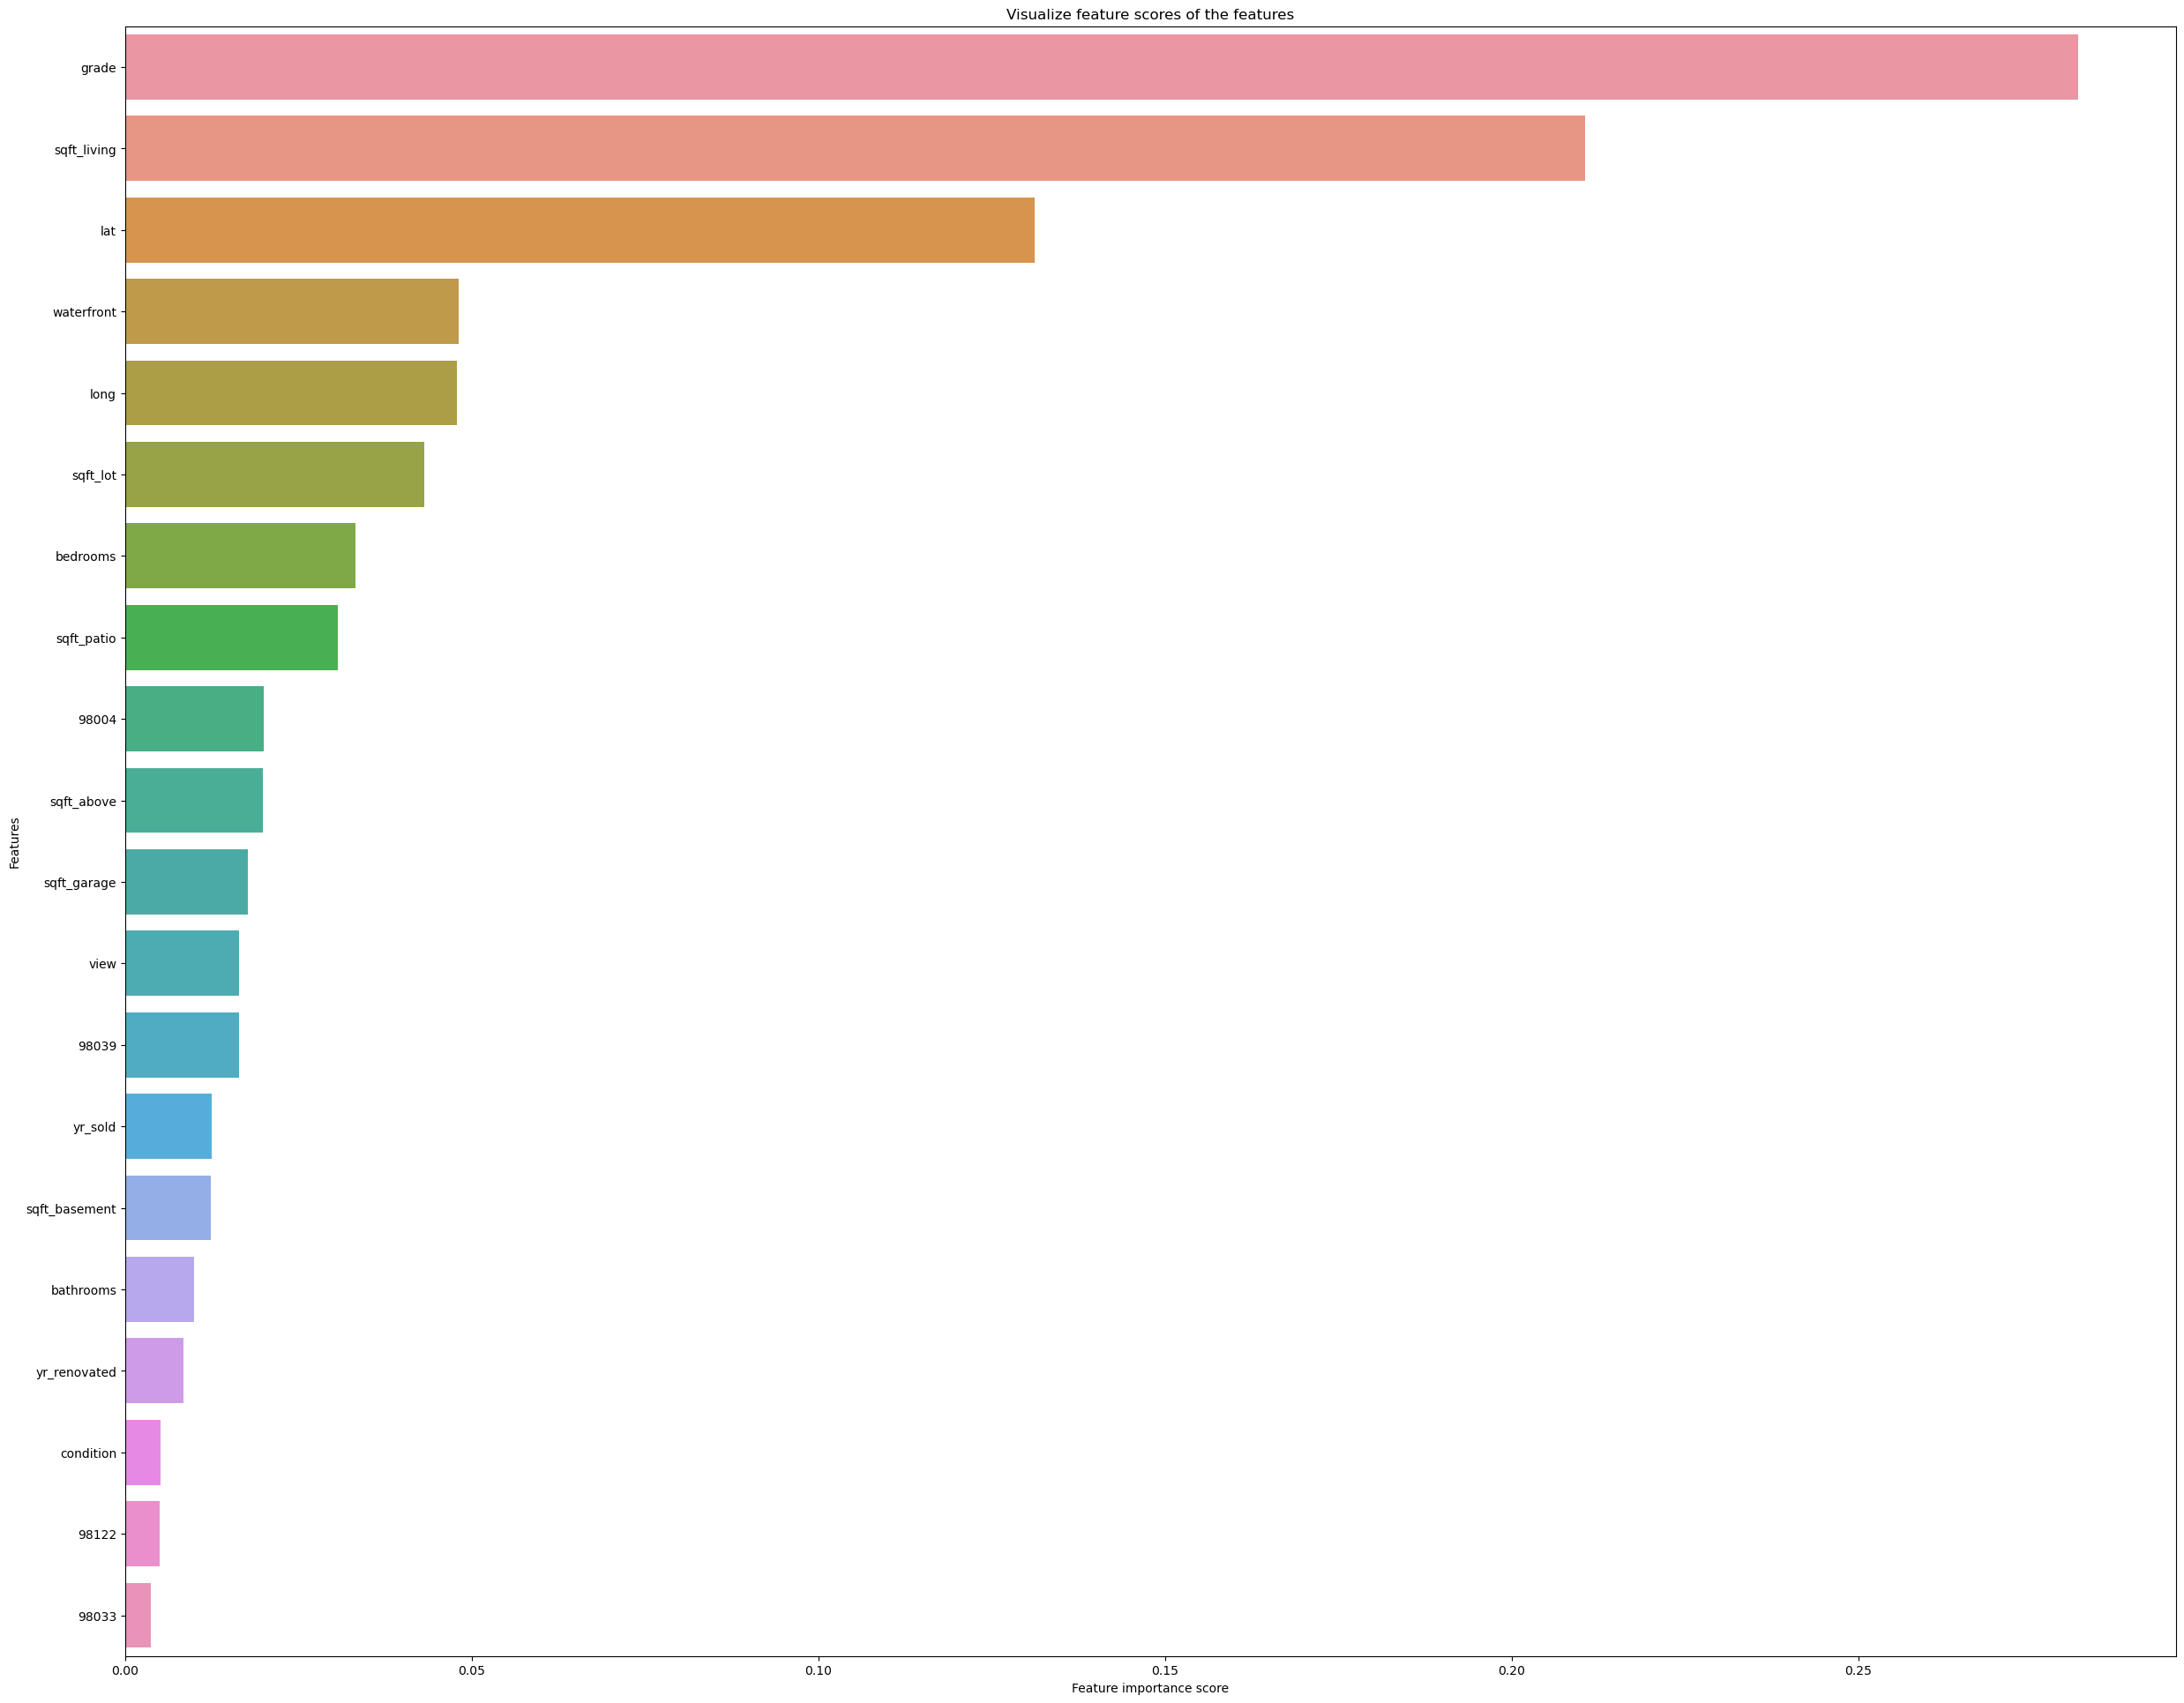

In [48]:
x_res=list(feature_scores[:20])
y_res=list(feature_scores.index[:20])

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=x_res, y=y_res)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(y_res)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

## Investments and Potential Returns Prediction Output
**COMING SOON!**

In [49]:
# create a new DataFrame and assign it to input_df
# input_df = X_train

# Inputing numerical value for each predictor, convert to int value
# sqft_living_input = int(input("Enter sqft Living: "))
# bedrooms = int(input("Number of Bedrooms: "))
# bathrooms = int(input("Number of Bathrooms: "))
# floors = int(input("Number of Floors: "))
# view = int(input("Enter View Quality (0-4): "))
# condition = int(input("Enter Condition Quality (1-5): "))
# grade = int(input("Enter Grade Quality (1-13): "))
# yr_renovated = int(input(Renovated ))

# input_df.loc[0, 'bathrooms' ] = bathrooms
# input_df.loc[0, 'bedrooms' ] = bedrooms
#input_df.loc[0, 'floors'] = floors
# input_df.loc[0, 'view' ] = view
# input_df.loc[0, 'condition'] = condition
#input_df.loc[0, 'grade'] = grade
# input_df.loc[0, 'yr_renovated'] = renovated


# provide price 
# predict_price = np.exp(second_model_lr.predict(input_df))
# print()
# print('Predicted Sale Price: $', round(predict_price[0],2))

# Conclusion
In conclusion, Random Forest Model performed the best with a R2 of 0.744. The model's top 5 predictors are: `grade`, `sqft_living`, `lat`, `waterfront`, `long`. 

In addition to its high R2 value and top predictors, another advantage of the Random Forest Model is its ability to handle missing values and outliers effectively, making it a robust option for real-world applications. Furthermore, the random nature of the model and the inclusion of multiple decision trees help to reduce bias and increase the model's stability. Overall, the Random Forest Model is a reliable and powerful tool for predictive modeling.


### Next Steps

#### Follow up and iterate
To enhance the accuracy and effectiveness of our analysis, we can collect more data on specific topics relevant to the housing market. By conducting thorough background research, we have discovered insightful information such as Seattle having a 22% increase in year-over-year rental rates, the eighth [fastest growing rental rate in the country](https://www.redfin.com/news/redfin-rental-report-july-2022/) according to Redfin. Furthermore, our research shows that [42% of office jobs in Seattle are tech work](https://www.lightercapital.com/blog/report-seattle-leads-nation-as-fastest-growing-tech-hub). These valuable insights can be used to refine our model and make more informed investment decisions that can bring significant returns on investment (ROI) to Silicon Sound Investment. By regularly updating and iterating the model with new data and additional variables, we can stay ahead of the competition and better navigate the dynamic housing market, resulting in better outcomes and higher profits for the company.